In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm
import seaborn as sns
import network_tools as nt
import importlib
import networkx as nx
import dynamics as dyn
from scipy.linalg import eig
import csv
from sklearn.cluster import KMeans,MiniBatchKMeans
import statespacesplitting as sss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import hmm_helper as hmmh

/tmp/ipykernel_747674/1503008179.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [126]:
importlib.reload(nt)
importlib.reload(dyn)
importlib.reload(sss)
importlib.reload(hmmh)

<module 'hmm_helper' from '/home/nartallokalu/Desktop/hmm/hmm_helper.py'>

In [129]:
N = 3
W = nt.generate_hierarchical_network(N,mu = 0.5,p0 = 1,recip = 10)

In [130]:
W

array([[0.        , 0.08788347, 0.02222133],
       [0.8788347 , 0.        , 0.04118758],
       [0.22221332, 0.41187584, 0.        ]])

In [131]:
Theta = 1
gamma = 0.1
sigma = 0.05
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)

[ True  True  True]


In [132]:
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)
tau = 20
X_sampled = X[:,0::tau]
t_sampled= t[0::tau]

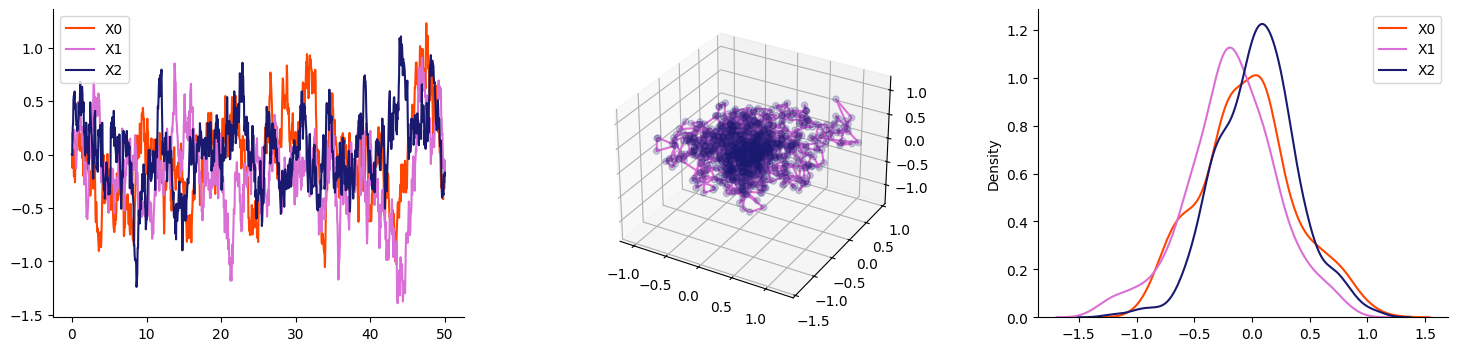

<Figure size 640x480 with 0 Axes>

In [133]:
fig = plt.figure()
axs=[0,0,0]
axs[0] = fig.add_subplot(1,3,1)
axs[1] = fig.add_subplot(1,3,2,projection='3d')
axs[2] = fig.add_subplot(1,3,3)
fig.set_size_inches(18,4)
cols = ['orangered','orchid','midnightblue']
for i in range(0,3):
    sns.lineplot(x=t,y=X[i,:],label = 'X'+str(i),ax=axs[0],color=cols[i])
    sns.despine()
    sns.kdeplot(X[i,:],label='X'+str(i),color=cols[i],ax=axs[2])
axs[1].plot(X[0,:], X[1,:], X[2,:], color = 'orchid')
axs[1].scatter(X[0,:], X[1,:], X[2,:], color = 'midnightblue',alpha=0.2)
axs[2].legend()
plt.show()
sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipykernel_747674/528250396.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


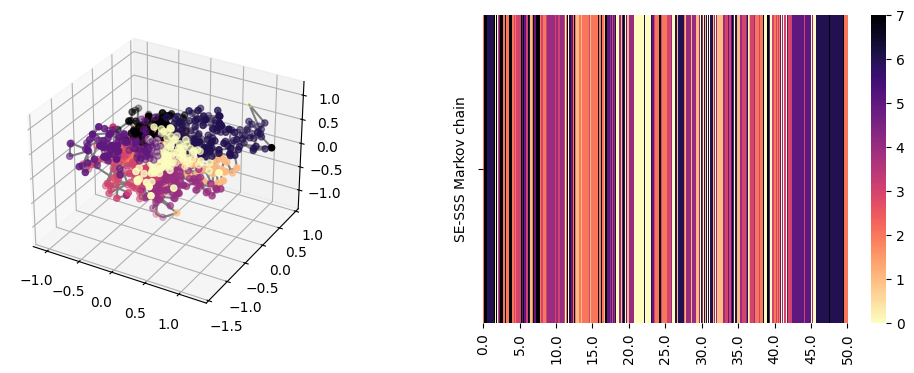

In [134]:
box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_stat_even(X,[2,2,2]))
colours =['orangered','orchid','midnightblue','forestgreen','violet','gold','lightblue','black']
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(box_idx_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":box_idx_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('SE-SSS Markov chain')
plt.show()
SE_SSS_TP = dyn.markov_chain_to_TP(box_idx_tc,8)

/tmp/ipykernel_747674/2142964681.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


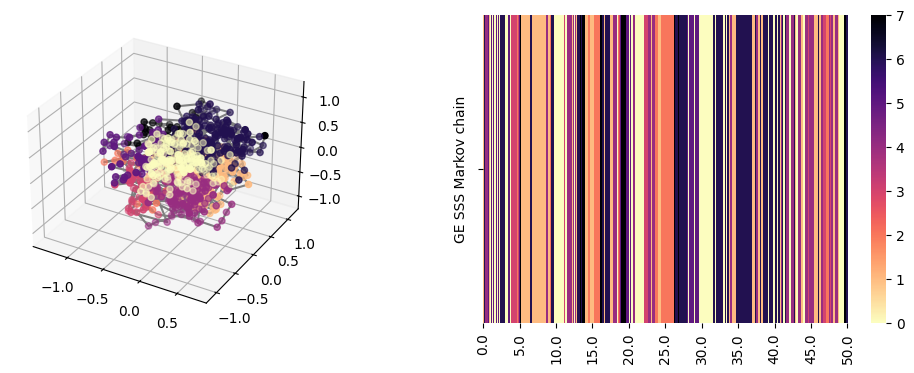

In [65]:
box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_geom_even(X,[2,2,2]))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(box_idx_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":box_idx_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('GE SSS Markov chain')
plt.show()
GE_SSS_TP = dyn.markov_chain_to_TP(box_idx_tc,8)

In [135]:
hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
hmm.train(X=None, Y=np.transpose(X))
hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(X),viterbi=True))

Init repetition 1 free energy = 1372.6088344229356
Init repetition 2 free energy = 1431.3539412098464
Init repetition 3 free energy = 1413.8298482701043
Init repetition 4 free energy = 1428.0944241192894
Init repetition 5 free energy = 1474.0526001791848
Best repetition: 1
Cycle 1 free energy = 1520.309709542465
Cycle 2 free energy = 1365.2423969902613
Cycle 3, free energy = 1363.0680653099666, relative change = 0.013827963265760055
Cycle 4, free energy = 1361.9326539048984, relative change = 0.007169039735569556
Cycle 5, free energy = 1360.1090146218003, relative change = 0.011383466744643371
Cycle 6, free energy = 1358.6644340936639, relative change = 0.008936732138477718
Cycle 7, free energy = 1358.3788271329104, relative change = 0.001763758441278399
Cycle 8, free energy = 1358.281472453375, relative change = 0.0006008500819631758
Cycle 9, free energy = 1358.21770278318, relative change = 0.0003934165013444733
Cycle 10, free energy = 1358.1568493559628, relative change = 0.00037528

/tmp/ipykernel_747674/3151467013.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


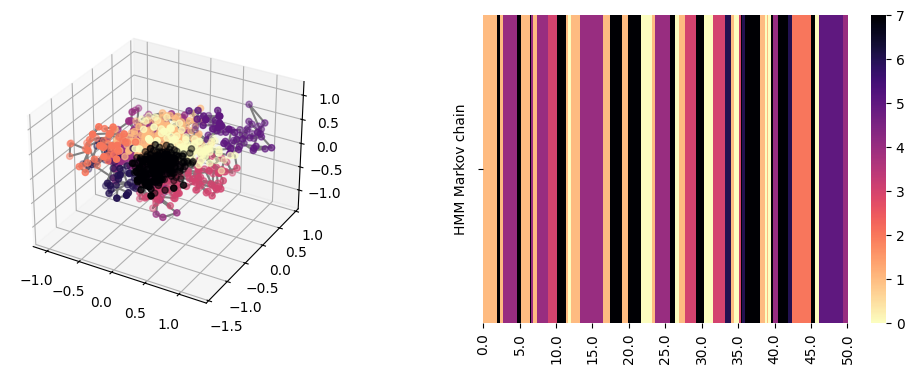

In [136]:
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(hmm_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":hmm_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('HMM Markov chain')
plt.show()

In [137]:
kmeans = KMeans(n_clusters = 8).fit(np.transpose(X))
kmeans.labels_

array([3, 3, 3, ..., 7, 0, 7], dtype=int32)

/tmp/ipykernel_747674/962611857.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


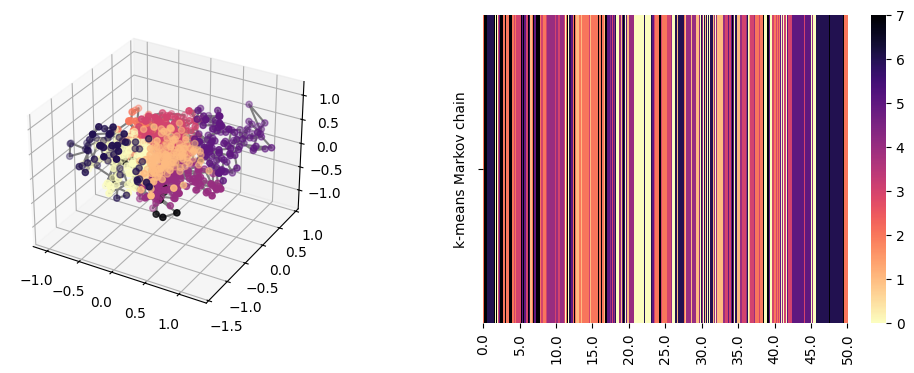

In [138]:
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(kmeans.labels_)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":box_idx_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('k-means Markov chain')
plt.show()

In [139]:
K_means_TP = dyn.markov_chain_to_TP(kmeans.labels_,8)
HMM_TP = hmm.P

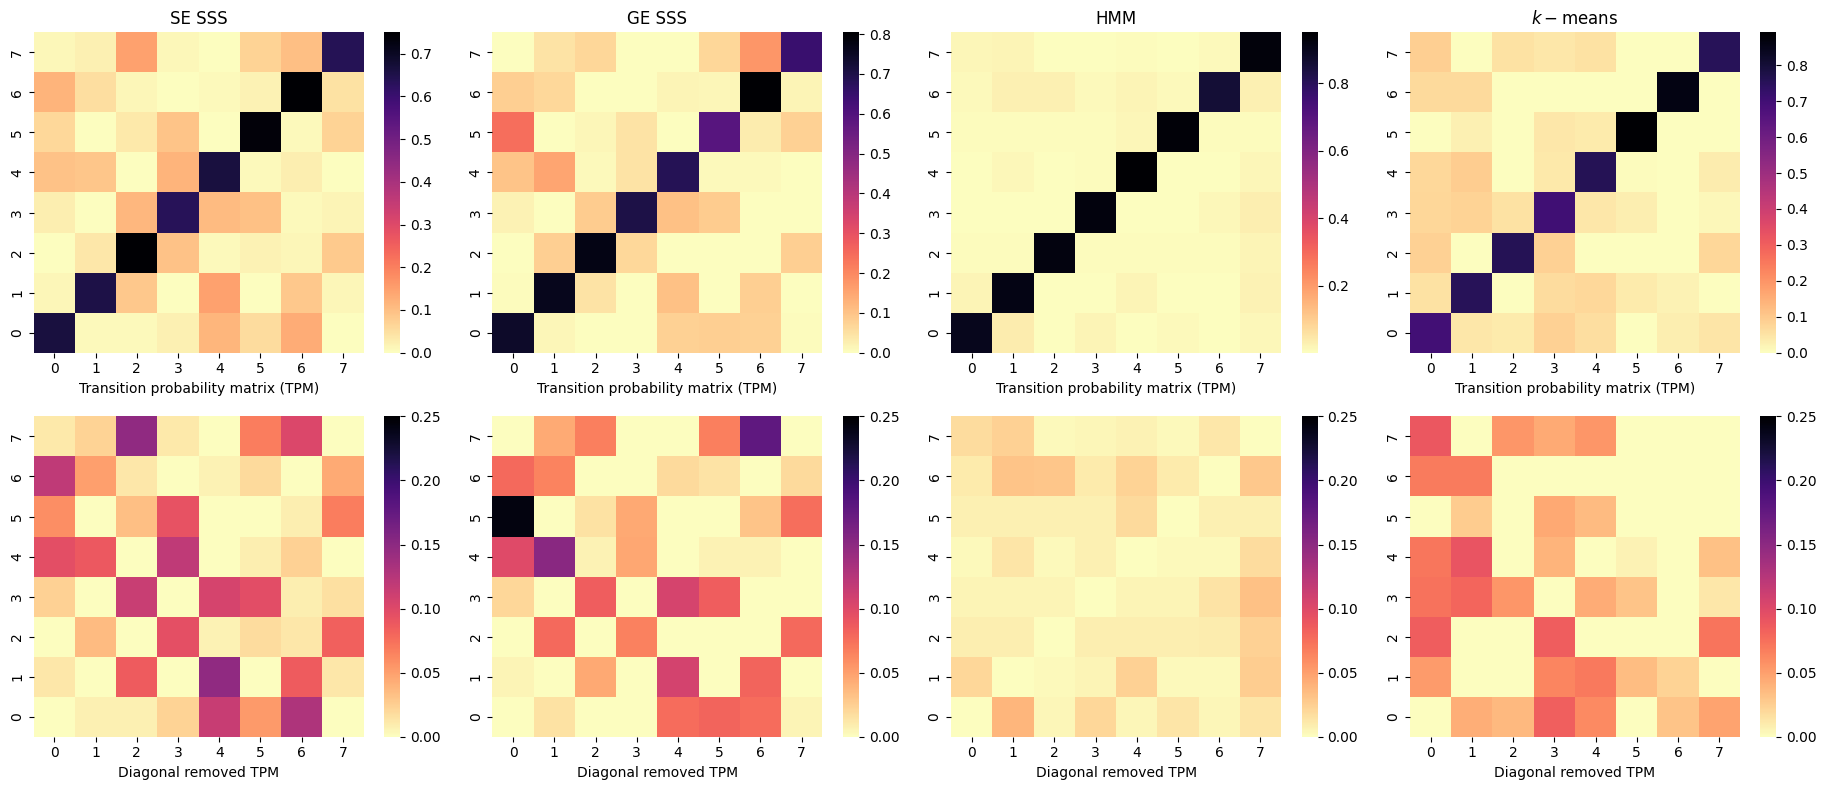

In [140]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(18.5,8)
sns.heatmap(SE_SSS_TP,ax=axs[0,0],cmap='magma_r')
axs[0,0].invert_yaxis()
sns.heatmap(GE_SSS_TP,ax=axs[0,1],cmap='magma_r')
axs[0,1].invert_yaxis()
sns.heatmap(HMM_TP,ax=axs[0,2],cmap='magma_r')
axs[0,2].invert_yaxis()
sns.heatmap(K_means_TP,ax=axs[0,3],cmap='magma_r')
axs[0,3].invert_yaxis()
sns.heatmap(SE_SSS_TP-np.diag(np.diag(SE_SSS_TP)),ax=axs[1,0],cmap='magma_r',vmin = 0,vmax = 0.25)
axs[1,0].invert_yaxis()
sns.heatmap(GE_SSS_TP-np.diag(np.diag(GE_SSS_TP)),ax=axs[1,1],cmap='magma_r',vmin = 0,vmax = 0.25)
axs[1,1].invert_yaxis()
sns.heatmap(HMM_TP-np.diag(np.diag(HMM_TP)),ax=axs[1,2],cmap='magma_r',vmin = 0,vmax = 0.25)
axs[1,2].invert_yaxis()
sns.heatmap(K_means_TP-np.diag(np.diag(K_means_TP)),ax=axs[1,3],cmap='magma_r',vmin = 0,vmax = 0.25)
axs[1,3].invert_yaxis()
axs[0,0].set_title('SE SSS')
axs[0,1].set_title('GE SSS')
axs[0,2].set_title('HMM')
axs[0,3].set_title(r'$k-$' + 'means')
for i in range(0,4):
    axs[0,i].set_xlabel('Transition probability matrix (TPM)')
for i in range(0,4):
    axs[1,i].set_xlabel('Diagonal removed TPM')
plt.tight_layout()
plt.show()

In [141]:
W

array([[0.        , 0.08788347, 0.02222133],
       [0.8788347 , 0.        , 0.04118758],
       [0.22221332, 0.41187584, 0.        ]])

In [142]:
EPR_true = []
trials = 50
eps_N = 100
EPR_kmeans_JSD =np.zeros((trials,eps_N))
EPR_HMM_JSD =np.zeros((trials,eps_N))
EPR_SESSS_JSD =np.zeros((trials,eps_N))
EPR_GESSS_JSD =np.zeros((trials,eps_N))

K=8
eps_range = np.linspace(0,1,eps_N)

for eps_i in range(0,eps_N):
    eps = eps_range[eps_i]
    W_hat = nt.parameterise_network(W,eps)
    Phi = dyn.EPR_network_ornstein_uhlenbeck(W_hat,sigma,Theta,gamma)
    EPR_true.append(Phi)
    for trial in range(0,trials):
        [X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,eps),sigma,Theta,gamma,dt,steps=5000)

        kmeans = KMeans(n_clusters = K).fit(np.transpose(X))
        km_JTP = dyn.markov_chain_to_JTP(kmeans.labels_,N=K)
        EPR_kmeans_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(km_JTP)

        hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
        hmm.train(X=None, Y=np.transpose(X))
        hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(X),viterbi=True))
        hmm_JTP = dyn.markov_chain_to_JTP(hmm_tc,N=K)
        EPR_HMM_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(hmm_JTP)

        box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_geom_even(X,[2,2,2]))
        gesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_GESSS_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(gesss_JTP)

        box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_stat_even(X,[2,2,2]))
        sesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_SESSS_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(sesss_JTP)


EPR_kmeans_JSD = pd.DataFrame(EPR_kmeans_JSD)
EPR_kmeans_JSD.to_csv('EPRkmeansJSD.csv',index=False)
EPR_HMM_JSD = pd.DataFrame(EPR_HMM_JSD)
EPR_HMM_JSD.to_csv('EPR_HMM_JSD.csv',index=False)
EPR_GESSS_JSD = pd.DataFrame(EPR_GESSS_JSD)
EPR_GESSS_JSD.to_csv('EPR_GESSS_JSD.csv',index=False)
EPR_SESSS_JSD = pd.DataFrame(EPR_SESSS_JSD)
EPR_SESSS_JSD.to_csv('EPR_SESSS_JSD.csv',index=False)
EPR_true = pd.DataFrame(EPR_true)
EPR_true.to_csv('EPR_true.csv',index=False)

Init repetition 1 free energy = 6730.450997694321
Init repetition 2 free energy = 6789.232156263979
Init repetition 3 free energy = 6856.574601863747
Init repetition 4 free energy = 6867.308398187419
Init repetition 5 free energy = 7068.083284501789
Best repetition: 1
Cycle 1 free energy = 7003.314292402133
Cycle 2 free energy = 6705.410585270991
Cycle 3, free energy = 6691.278153318562, relative change = 0.045291010182138484
Cycle 4, free energy = 6679.904385389728, relative change = 0.03516827308693755
Cycle 5, free energy = 6672.084923708693, relative change = 0.023607392399652278
Cycle 6, free energy = 6667.939523538125, relative change = 0.012360501013863727
Cycle 7, free energy = 6665.797423247641, relative change = 0.006346646601251631
Cycle 8, free energy = 6664.197391720889, relative change = 0.004718229977738425
Cycle 9, free energy = 6662.621618163428, relative change = 0.004625205285032479
Cycle 10, free energy = 6661.08783392934, relative change = 0.004481781569234509
Cycl